## Importando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from skimage import io, color, feature, data
from sklearn import preprocessing
# permite dividir o conjunto de dados en treino e teste
from sklearn.model_selection import train_test_split
from sklearn import metrics, datasets
from sklearn import svm
import matplotlib.pyplot as plt

## Leitura da bas MNIST em formato csv

<p>A base de dados MNIST (base de dados do Instituto Nacional Modificado de Padrões e Tecnologia) é uma coleção amplamente utilizada de dígitos manuscritos, comumente empregada para treinar e testar sistemas de processamento de imagens e modelos de aprendizado de máquina.</p>

<img src="https://datasets.activeloop.ai/wp-content/uploads/2019/12/MNIST-handwritten-digits-dataset-visualized-by-Activeloop.webp" />

<p>
O conjunto de dados original está em um formato que pode ser desafiador para iniciantes. Este dataset, criado com o trabalho de Joseph Redmon, fornece a base MNIST em formato CSV, disponível no <a href="https://www.kaggle.com/datasets/oddrationale/mnist-in-csv">Kaggle</a></p>

<p>
O conjunto de dados está dividido em dois arquivos:
 <ol>
 <li>mnist_train.csv</li>
 <li>mnist_test.csv</li>
 </ol>
<p>

<p>
O arquivo <i>mnist_train.csv</i> contém 60.000 exemplos de treinamento, enquanto o <i>mnist_test.csv</i> contém 10.000 exemplos de teste. Cada linha desses arquivos é composta por 785 valores: o primeiro valor é o rótulo (um número de 0 a 9) e os 784 valores restantes correspondem aos valores de pixel (números entre 0 e 255). A imagem bidimensional de $28 \times 28$ pixels é reorganizada em um vetor unidimensional de $1 \times 784$, onde cada linha da matriz representa uma imagem distinta.</p>


In [ ]:
# download do treino
!gdown 1QsPU-7UkrI2JH_MUv99RNdnOhGxUIlPb

Downloading...
From (original): https://drive.google.com/uc?id=1QsPU-7UkrI2JH_MUv99RNdnOhGxUIlPb
From (redirected): https://drive.google.com/uc?id=1QsPU-7UkrI2JH_MUv99RNdnOhGxUIlPb&confirm=t&uuid=318845f7-4049-4822-b500-193ae8d994e5
To: /content/mnist_train.csv
100% 110M/110M [00:00<00:00, 128MB/s]


In [ ]:
# download do teste
!gdown 1v8m7yCg0GrJBzWs2MVUPs_Ywe3dTvbCx

Downloading...
From: https://drive.google.com/uc?id=1v8m7yCg0GrJBzWs2MVUPs_Ywe3dTvbCx
To: /content/mnist_test.csv
100% 18.3M/18.3M [00:00<00:00, 42.8MB/s]


## Carregar os arquivos com o conjunto de treino e teste

In [ ]:
data_train = pd.read_csv('mnist_train.csv')
data_test = pd.read_csv('mnist_test.csv')

### Separação das imagens de seus respectivos rótulos e transformação dos dados para o formato Numpy

In [ ]:
# imagens
x_train = data_train.iloc[:,1:].to_numpy()
# etiquetas
y_train = data_train.iloc[:,0].to_numpy()

# imagen
x_test = data_test.iloc[:,1:].to_numpy()
# etiquetas
y_test = data_test.iloc[:,0].to_numpy()

## Histograma de Gradientes Orientados (HoG)
<p>
O Histograma de Gradientes Orientados, conhecido como HOG, é um descritor de características semelhante ao SIFT (<i>Scale Invariant Feature Transform</i>). Ele é amplamente utilizado em visão computacional e processamento de imagens para detecção de objetos. A técnica consiste em contar as ocorrências das orientações dos gradientes em regiões específicas de uma imagem. O descritor HOG foca na estrutura ou forma de um objeto, sendo mais eficaz do que descritores de borda, pois utiliza tanto a magnitude quanto o ângulo do gradiente para calcular as características. Em diferentes regiões da imagem, o HOG gera histogramas baseados na magnitude e nas orientações dos gradientes.</p>

<p>
<b>feature.hog</b>(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), block ch_norm='L2-Hys', channel_axis=None)

Parâmetros:
<ul>
 <li>image: imagem</li>
 <li>orientations: número de orientações dos gradientes</li>
 <li>pixels_per_cell: tamanho da célula</li>
 <li>cells_per_block: número de células em cada bloco</li>
 <li>block_norm: str {'L1', 'L1-sqrt', 'L2', 'L2-Hys'}. Tipo de normalização utilizada nos blocos</li>
 <li>channel_axis: se Nenhum, a imagem será considerada em tons de cinza. Se a imagem for colorida, indique qual dimensão corresponde ao canal de cores</li>
</ul>

Retorna:
<ul>
 <li>out: descritor HoG da imagem, é um vetor 1D unidimensional</li>
</ul>
</p>

<p>A seguir, veremos um exemplo de como usar a função <b>feature.hog</b> para extrair o vetor de características de uma imagem. É importante lembrar que o tamanho do descritor dependerá da dimensão da imagem.</p>

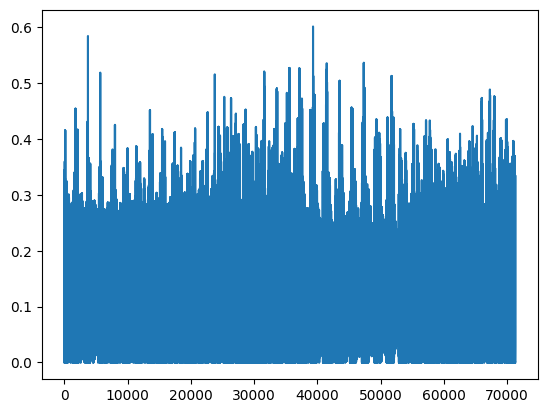

In [ ]:
img = color.rgb2gray(data.chelsea())
fd = feature.hog(img, orientations=9, pixels_per_cell=(8, 8),  cells_per_block=(2, 2))
plt.plot(fd)

## Exercício

<p>
Utilize um classificador SVM com os dígitos manuscritos da base de dados MNIST. Para isso, extraia e gere o vetor de características HoG para cada uma das imagens. Este processo deve ser realizado tanto para o conjunto de treinamento quanto para o de teste. Registre cada um dos descritores em uma matriz. Usando os seguintes parâmetros no descritor <i>HoG (orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2))</i>, será gerado um descritor de 144 elementos para uma imagem de 28x28 pixels.</p>

<p>
A função <i>feature_extraction(dataset)</i> será utilizada para extrair o descritor HoG das imagens. Lembre-se de redimensionar a imagem do formato unidimensional de 728 elementos para o formato bidimensional de 28x28 pixels antes de realizar a extração de características.
</p>

In [ ]:
def feature_extraction(dataset):
  hog_features = []
  for image in dataset:
    # redimensionar a imagem para 28x28 pixels
    image_reshaped = image.reshape(28,28)
    # extrair as características HOG
    fd = feature.hog(image_reshaped, orientations=9, pixels_per_cell=(8, 8),  cells_per_block=(2, 2))
    hog_features.append(fd)
  return np.array(hog_features)

<p>Extraia descritores do conjunto de treinamento e teste</p>

In [ ]:
hog_X_train = feature_extraction(x_train)
hog_X_test = feature_extraction(x_test)

# Processamentos dos dados
## Normalizar os dados

<p>O objetivo da normalização é alterar os valores das colunas numéricas no conjunto de dados para uma escala comum, sem distorcer as diferenças nos intervalos de valores.

* Normalização
$$X_{new} = \frac{ X - X_{min} }{ X_{max} - X_{min} }$$

* Padronização
$$X_{changed} = \frac{ X - \mu }{ \sigma } $$
</p>

<p>Normalizar os dados usando a normalização ppopr padronização.</p>

In [ ]:
# padronização
std_scaler = preprocessing.StandardScaler().fit(hog_X_train)
hog_Xn_train = std_scaler.transform(hog_X_train)
hog_Xn_test = std_scaler.transform(hog_X_test)

<p> Divida o conjunto de treino em dois subconjuntos: treino e validação. Em seguida, instancie um classificador SVM e treine-o com o subconjunto de treino. Valide o desempenho dos hiperparâmetros escolhidos utilizando o subconjunto de validação. Por fim, avalie o modelo utilizando o conjunto de teste. Gere a matriz de confusão tanto para a validação quanto para o teste.</p>

In [ ]:

# dividir o conjunto de dados em dois subconjuntos: treino e validação
X_train, X_val, y_train, y_val = train_test_split(hog_Xn_train, y_train, test_size=0.2, random_state=42)


### Instânciar um classificador SVM, treine com o conjunto de treino e avalie os conjuntos de validaçao e teste

In [ ]:
# instanciar o classificador SVM
clf_svm = svm.SVC(kernel='linear')

# treinar o classificador com o conjunto de treino
clf_svm.fit(X_train, y_train)

# predizer no conjunto de validação
y_pred_val = clf_svm.predict(X_val)

#inserir código
# calcular a acurácia
accuracy = metrics.accuracy_score(y_val, y_pred_val)
print("Acurácia no conjunto de validação:", accuracy)


Acurácia no conjunto de validação: 0.95375


### Matriz de confusão da validação

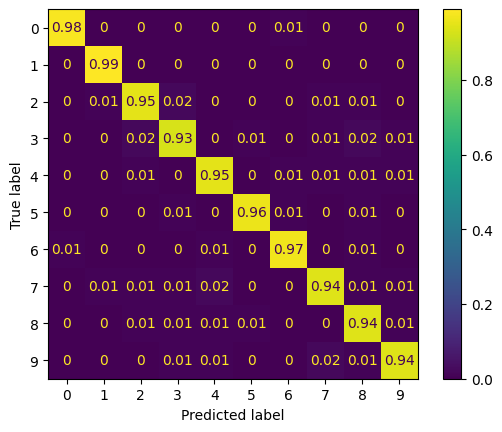

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on validation set
y_val_pred = clf_svm.predict(X_val)

# Generate confusion matrix
cm_validation = confusion_matrix(y_val, y_val_pred)

cm_normalization = cm_validation.astype('float') / cm_validation.sum(axis=1)[:, np.newaxis]
cm_normalization = np.round(cm_normalization, 2)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_normalization, display_labels=clf_svm.classes_)
disp.plot()
plt.show()


### Matriz de confusão do teste

Acurácia no conjunto de teste: 0.9561


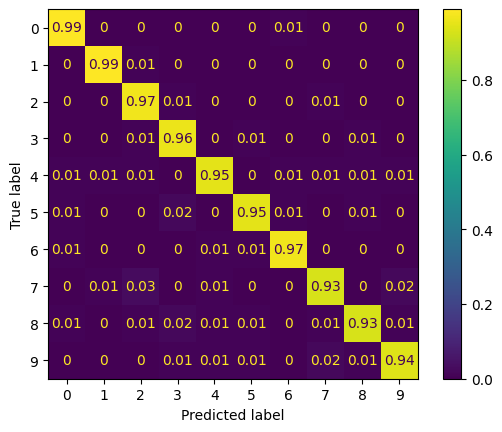

In [ ]:
# predizer no conjunto de teste
y_pred_test = clf_svm.predict(hog_Xn_test)

# calcular a acurácia
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
print("Acurácia no conjunto de teste:", accuracy_test)

# gerar a matriz de confusão
cm_test = confusion_matrix(y_test, y_pred_test)


# Generate confusion matrix


cm_normalize = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
cm_normalize = np.round(cm_normalize, 2)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_normalize, display_labels=clf_svm.classes_)
disp.plot()
plt.show()


### Comparar os classificadores DecisionTreeClassifier, RandomForestClassifier e KNeighborsClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### Calcule a acurácia média micro e macro dos 4 classificadores (SVM, Árvore de decisao, Random Forest e KNN)

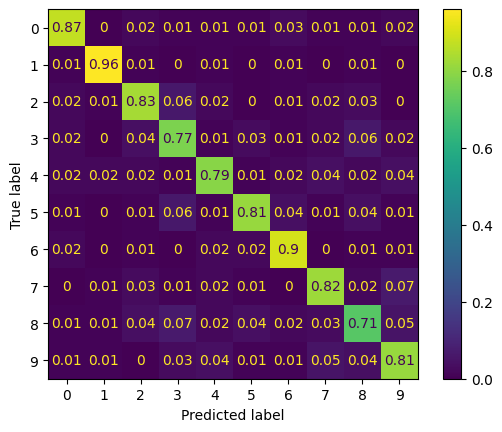

In [ ]:
#inserir código
# Decision Tree
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(hog_Xn_test)

# Predict on validation set
y_val_dt = clf_dt.predict(X_val)

# Generate confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

cm_normalization = cm_dt.astype('float') / cm_dt.sum(axis=1)[:, np.newaxis]
cm_normalization = np.round(cm_normalization, 2)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_normalization, display_labels=clf_svm.classes_)
disp.plot()
plt.show()





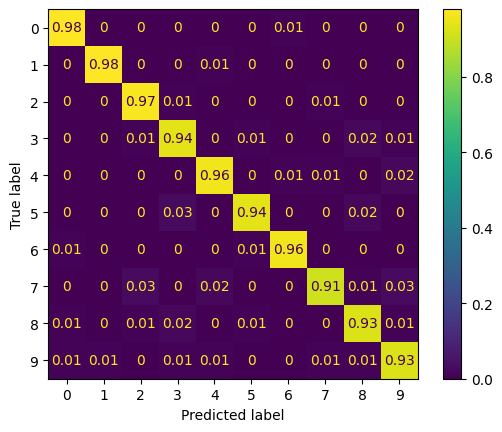

In [ ]:
# Random Forest
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(hog_Xn_test)

# Predict on validation set
y_val_rf = clf_rf.predict(X_val)

# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

cm_normalization = cm_rf.astype('float') / cm_rf.sum(axis=1)[:, np.newaxis]
cm_normalization = np.round(cm_normalization, 2)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_normalization, display_labels=clf_svm.classes_)
disp.plot()
plt.show()

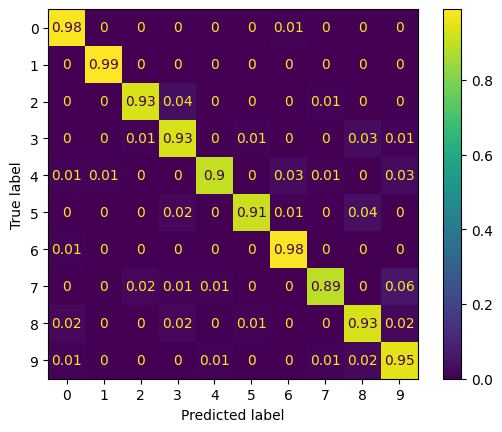

In [ ]:
# KNN
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(hog_Xn_test)

# Generate confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

cm_normalization = cm_knn.astype('float') / cm_knn.sum(axis=1)[:, np.newaxis]
cm_normalization = np.round(cm_normalization, 2)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_normalization, display_labels=clf_svm.classes_)
disp.plot()
plt.show()

In [ ]:
def calculate_accuracy(cm):
    """Calcula a acurácia média micro e macro a partir de uma matriz de confusão."""

    # Acurácia micro: soma dos elementos da diagonal dividido pela soma de todos os elementos
    accuracy_macro = np.trace(cm) / np.sum(cm)

    # Acurácia macro: média das acurácias individuais de cada classe
    accuracies_per_class = np.diag(cm) / np.sum(cm, axis=1)
    accuracy_micro = np.mean(accuracies_per_class)

    return accuracy_micro, accuracy_macro

# Calcula as acurácias para cada matriz de confusão
cms = [cm_test,cm_dt,cm_knn,cm_rf]  # Adicione as outras matrizes de confusão aqui

for cm in cms:
    accuracy_micro, accuracy_macro = calculate_accuracy(cm)
    print("Acurácia média micro:", accuracy_micro)
    print("Acurácia média macro:", accuracy_macro)
    print("---------------------")

Acurácia média micro: 0.9556745134188336
Acurácia média macro: 0.9561
---------------------
Acurácia média micro: 0.8276346917606542
Acurácia média macro: 0.8295
---------------------
Acurácia média micro: 0.9393983841699631
Acurácia média macro: 0.94
---------------------
Acurácia média micro: 0.9511428625903313
Acurácia média macro: 0.9515
---------------------
